# Buscamos relacion entre las caracteristicas de un vuelo y la probabilidad de que se cancele/se retrase


In [3]:
import os
import sqlite3
import pandas as pd
import numpy as np                   # Para cosas de álgebra lineal
import matplotlib.pyplot as plt      # Para gráficos
import seaborn as sns                # Para gráficos lindos :^)
sns.set_style("darkgrid")
from sklearn import linear_model     # Para CML
conn = sqlite3.connect('../vuelos.db')

import warnings
warnings.filterwarnings('ignore')

In [4]:
def read_from_db(query, conn, cache_fn=None):
    if cache_fn and os.path.exists(cache_fn):
        return pd.read_csv(cache_fn)
    df = pd.read_sql_query(query, conn)
    if cache_fn:
        df.to_csv(cache_fn)
    return df

# Porcentaje de vuelos retrasados en el aterrizaje segun duracion del vuelo (2003-2008)

In [33]:
df = read_from_db('''
select o.CRSElapsedTime as Duracion, count(*)*1.0/o2.amount as DelayPercentage, o2.amount as TotalAmount
from ontime o
join (select CRSElapsedTime as Duracion2, count(*) as amount from ontime where Duracion2 != "NA"
  and year != 2001 and year != 2002 and year >= {yearfrom} and year <= {yearto}
  group by Duracion2)
  as o2 on Duracion2 = Duracion
where Duracion != "NA"
  and o.ArrDelay >= 15
  and o.year >= {yearfrom}
  and o.year <= {yearto}
  and o.year != 2001 and o.year != 2002
  group by Duracion
order by Duracion asc;
'''.format(yearfrom=2003, yearto=2008), conn, '../data/exp/duracion_porcentaje_retrasados_2003_2008.csv')

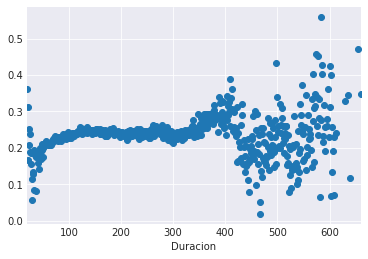

In [34]:
df2 = df[df['DelayPercentage'] < 1.0]
df3 = df2[df2['Duracion'] < 800]
df4 = df3[df3['Duracion'] >= 20]
ax = sns.tsplot(time=df4['Duracion'], data=df4['DelayPercentage'], interpolate=False)
plt.show()

# Promedio de retraso en el aterrizaje segun duracion del vuelo (2003-2008) 

In [8]:
df = read_from_db('''select o.CRSElapsedTime as ElapsedTime, avg(o.ArrDelay) as ArrDelay
                       from ontime o
                       where ElapsedTime != "NA"
                       and year>=2003
                       group by ElapsedTime
                       order by ElapsedTime asc;
'''.format(yearfrom=2003, yearto=2008), conn, '../data/exp/duracion_promedio_retraso_2003_2008.csv')

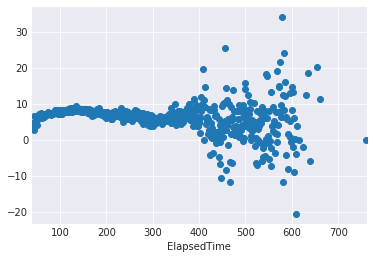

In [9]:
df2 = df[df['ArrDelay'] < 60]
df3 = df2[df2['ElapsedTime'] < 800]
df4 = df3[df3['ElapsedTime'] >= 40]
ax = sns.tsplot(time=df4['ElapsedTime'], data=df4['ArrDelay'], interpolate=False)
plt.show()

# Promedio de retraso en el aterrizaje segun duracion de vuelo, sin contar retrasos negativos (2003-2008)

In [24]:
df = read_from_db('''select o.CRSElapsedTime as ElapsedTime, avg(o.ArrDelay) as ArrDelay
                       from ontime o
                       where ElapsedTime != "NA"
                       and year>=2003
                       and o.ArrDelay >= 0
                       group by ElapsedTime
                       order by ElapsedTime asc;
'''.format(yearfrom=2003, yearto=2008), conn, '../data/exp/duracion_promedio_retraso_sinneg_2003_2008.csv')

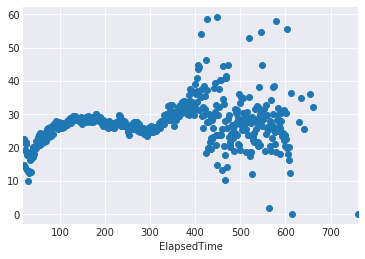

In [29]:
df2 = df[df['ArrDelay'] < 60]
df3 = df2[df2['ElapsedTime'] < 800]
df4 = df3[df3['ElapsedTime'] >= 20]
ax = sns.tsplot(time=df4['ElapsedTime'], data=df4['ArrDelay'], interpolate=False)
plt.show()

# Promedio de retraso en el aterrizaje segun duracion de vuelo, sin contar retrasos negativos, sacando outliers (2003-2008)

In [ ]:
df = read_from_db('''select o.CRSElapsedTime as ElapsedTime, avg(o.ArrDelay) as ArrDelay
                       from ontime o
                       where ElapsedTime != "NA"
                       and year>=2003
                       and o.ArrDelay <= 60
                       and o.ArrDelay >= 0
                       group by ElapsedTime
                       order by ElapsedTime asc;
'''.format(yearfrom=2003, yearto=2008), conn, '../data/exp/duracion_promedio_retraso_sinneg_sinoutliers60_2003_2008.csv')

In [ ]:
df2 = df[df['ArrDelay'] < 60]
df3 = df2[df2['ElapsedTime'] < 800]
df4 = df3[df3['ElapsedTime'] >= 20]
ax = sns.tsplot(time=df4['ElapsedTime'], data=df4['ArrDelay'], interpolate=False)
plt.show()

# Promedio de retraso en el despegue segun duracion del vuelo (2003-2008)

In [10]:
df = read_from_db('''select o.CRSElapsedTime as ElapsedTime,avg(o.DepDelay) as DepDelay
                       from ontime o
                       where ElapsedTime != "NA"
                       and year>2003
                       group by ElapsedTime
                       order by ElapsedTime asc;'''.format(yearfrom=2003, yearto=2008), conn, '../data/exp/duracion_depdelay_2003_2008.csv')

385


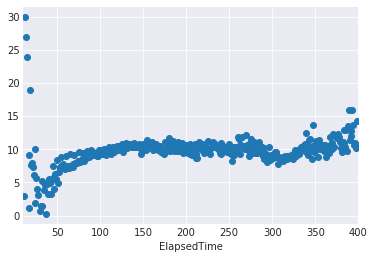

In [12]:
##df = df.drop('Month', axis=1)
df2 = df
df2 = df2[df2['DepDelay'] < 100]
df2 = df2[df2['DepDelay'] >= 0]
df2 = df2[df2['ElapsedTime'] < 400]
df2 = df2[df2['ElapsedTime'] >= 10]
print(df2.count()[0])
ax = sns.tsplot(time=df2['ElapsedTime'], data=df2['DepDelay'], interpolate=False)
plt.show()

# Promedio de retraso en el despegue segun duracion del vuelo (1988-2000)

In [13]:
df_1998_2000 = read_from_db('''select o.CRSElapsedTime as ElapsedTime, avg(o.DepDelay) as DepDelay
                       from ontime o
                       where ElapsedTime != "NA"
                       and year>='{yearfrom}' and year<='{yearto}'
                       group by ElapsedTime
                       order by ElapsedTime asc;'''.format(yearfrom=1988, yearto=2000), conn, '../data/exp/duracion_depdelay_1988_2000.csv')

390


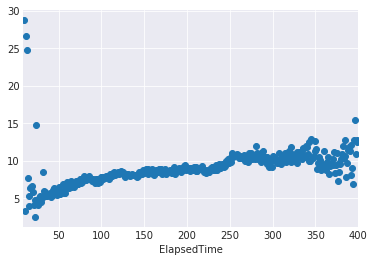

In [14]:
##df = df.drop('Month', axis=1)
df2 = df_1998_2000
df2 = df2[df2['DepDelay'] < 100]
df2 = df2[df2['DepDelay'] >= 0]
df2 = df2[df2['ElapsedTime'] < 400]
df2 = df2[df2['ElapsedTime'] >= 10]
print(df2.count()[0])
ax = sns.tsplot(time=df2['ElapsedTime'], data=df2['DepDelay'], interpolate=False)
plt.show()

# Promedio de NASDelay segun duracion del vuelo (2003-2008)

In [26]:
df_2003_2008_delays = read_from_db('''select o.CRSElapsedTime as ElapsedTime, avg(o.WeatherDelay), avg(o.NASDelay),
avg(o.SecurityDelay),  avg(o.ArrDelay), avg(o.LateAircraftDelay), avg(o.DepDelay) as DepDelay
from ontime o
where ElapsedTime != "NA"
and year>='{yearfrom}' and year<='{yearto}'
and month = 4
group by ElapsedTime
order by ElapsedTime asc;'''.format(yearfrom=2003, yearto=2008), conn, '../data/exp/duracion_nasdelay_2003_2008_2.csv')

540


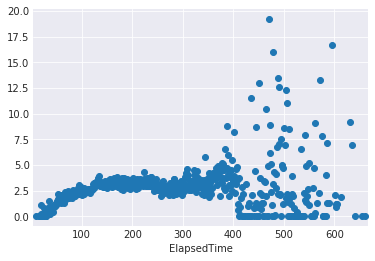

In [27]:
##df = df.drop('Month', axis=1)
df2 = df_2003_2008_delays
df2 = df2[df2['avg(o.NASDelay)'] < 40]
#df2 = df2[df2['TotalDelay'] >= 0]
df2 = df2[df2['ElapsedTime'] < 800]
df2 = df2[df2['ElapsedTime'] >= 10]
print(df2.count()[0])
ax = sns.tsplot(time=df2['ElapsedTime'], data=df2['avg(o.NASDelay)'], interpolate=False)
plt.show()

# Promedio de WeatherDelay segun duracion del vuelo (2003-2008)

540


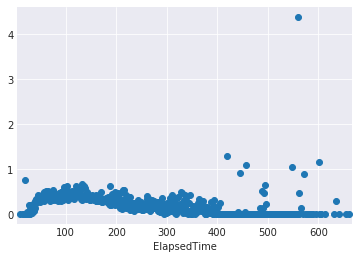

In [28]:
##df = df.drop('Month', axis=1)
df2 = df_2003_2008_delays
df2 = df2[df2['avg(o.NASDelay)'] < 40]
#df2 = df2[df2['TotalDelay'] >= 0]
df2 = df2[df2['ElapsedTime'] < 800]
df2 = df2[df2['ElapsedTime'] >= 10]
print(df2.count()[0])
ax = sns.tsplot(time=df2['ElapsedTime'], data=df2['avg(o.WeatherDelay)'], interpolate=False)
plt.show()

# Porcentaje de vuelos cancelados segun duracion (2008)

In [19]:
df_2008_cancelled = read_from_db('''
select o.CRSElapsedTime as Duracion, count(*)*1.0/o2.amount as CancelledPercentage, o2.amount as TotalAmount
from ontime o
join (select CRSElapsedTime as Duracion2, count(*) as amount from ontime where Duracion2 != "NA"
  and year != 2001 and year != 2002 and year >= {yearfrom} and year <= {yearto} and month = 12
  group by Duracion2)
  as o2 on Duracion2 = Duracion
where Duracion != "NA"
  and o.Cancelled = 1
  and o.year >= {yearfrom}
  and o.year <= {yearto}
  and o.month = 12
  and o.year != 2001 and o.year != 2002
  group by Duracion
order by Duracion asc;
'''.format(yearfrom=2008, yearto=2008), conn, '../data/exp/duracion_2008_cancelled3.csv')

367


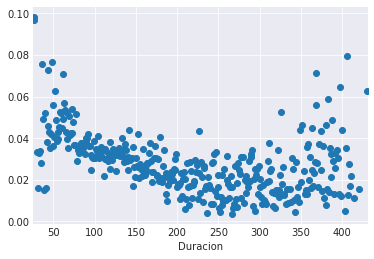

In [20]:
##df = df.drop('Month', axis=1)
df2 = df_2008_cancelled
df2 = df2[df2['CancelledPercentage'] < 0.1]
#df2 = df2[df2['TotalDelay'] >= 0]
df2 = df2[df2['Duracion'] < 800]
df2 = df2[df2['Duracion'] >= 10]
#print(df2.describe())
print(df2.count()[0])
ax = sns.tsplot(time=df2['Duracion'], data=df2['CancelledPercentage'], interpolate=False)
plt.show()